# Exercise 3: Data Visualization

In [2]:
# general imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Task 1: An Application of Bayes Theorem
We revisit the example of an application of Bayes' Theorem that was presented in lecture:  
A medical test $T$ for a disease $D$ was an accuracy of 95%, i.e. it holds that
$$ P(T = + | D = +) = P(T = - | D = -) = 0.95 .$$

Now let $p$ denote the prevalence of the disease in the population, i.e. 
$$ P(D = +) = p. $$

#### a) Applying Bayes Theorem
Write a function that, based on the input prevalence p, returns the probability that a person which has had a positive test indeed has the disease.

In [2]:
def disease_probability(p):
    return (0.95*p)/(0.95*p + 0.05*(1-p))

#### b) Plotting the probabilities
Using your function from a), compute the probabilities that a person which has had a positive test indeed has the disease for all prevalences $p = 0.001 * i,\, i=1,\dots,1000$.  
Use matplotlib to visualize your results in a scatterplot with the following specifications: 
* since we have many points, reduce the point size to 0.2
* limit the axes to the interval $[0,1]$, and include a tick at every 0.1
* add horizontal grid lines at every tick of the y-axis line
* include proper axis labels
* color the points blue if its corresponding conditional probability is below 0.5, and red otherwise
* add a black vertical line at the first point where the conditional probability is above 0.5

0.05


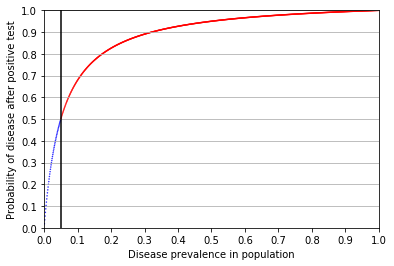

In [97]:
x =  [0.001 * (p+1) for p in range(1000)]
y = [disease_probability(p) for p in x]

# use an array that specify colors per x-value
c = ["blue" if p < 0.5 else "red" for p in y]

# get "critical" value
v0 = x[int(np.where(np.array(y)>=.5)[0][0])]
print(v0)

# formnat axes
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.xlim(0,1)
plt.xlabel("Disease prevalence in population")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel("Probability of disease after positive test")
plt.ylim(0,1)

# add horizontal grid lines
plt.grid(axis = 'y')

# scatter and add horizontal line
plt.scatter(x, y, c=c, s = 0.2)
plt.axvline(x=v0, c="black")
plt.show()

### Task 2: Analyzing Air Quality over Time

In this task we analyze the air quality dataset that you can download from the UCI library: https://archive.ics.uci.edu/ml/datasets/Air+Quality

It measures the air quality in an Italian city from March 2004 until May 2005, and contains hourly averaged responses from an array of 5 metal oxide chemical sensors.

Note that this dataset is somewhat messy and not in standard format. Take a look into the data to check for column separator, decimals, and delete empty rows at the end of the file. Also check the documentation for specifics regarding missing values.

In [3]:
# load the data here - beware of time data and missing values (also check documentation on the UCI webpage)

# use this function to parse the date columns 0 and 1 when reading the data from csv.
dateparse = lambda x,y: pd.datetime.strptime(str(x)+str(y), '%d/%m/%Y%H.%M.%S')

df = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal = ',', na_values = "-200", parse_dates = [[0,1]], date_parser = dateparse).iloc[:,:-2]

#### a) Plotting Daily Responses over Time

We want to simultaneously plot the concentrations of CO, Benzene (C6H6), Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  for every day of June 2008 at 12:00.
Create a line plot with 4 lines, each corresponding to one of the 4 oxides, where the x axis represents the time, i.e. the day in June, and the x-axis the concentration in micrograms/m³. Note that CO is measured in mg/m³ and is thus magnitudes higher than the other gas. Since the oxide concentrations are in very different orders of magnitude, you should apply a logarithmic scale for the y-axis.

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


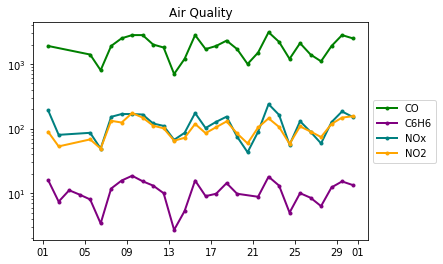

In [5]:
import matplotlib.dates as mdates

#preprocess data
df1 = df[pd.to_datetime(df['Date_Time']).dt.month == 6]
df1 = df1[pd.to_datetime(df['Date_Time']).dt.hour == 12]
df1.iloc[:,1] = df1.iloc[:,1] * 1000


## create plot
fig, ax = plt.subplots()

# Plot multiple lines after another

# masks for NaN-values
# -> we excluse Nans in the plot to avoid blank spaces in the plot
comask = np.isfinite(df1.loc[:,'CO(GT)'])
c6mask = np.isfinite(df1.loc[:,'C6H6(GT)'])
noxmask = np.isfinite(df1.loc[:,'NOx(GT)'])
no2mask = np.isfinite(df1.loc[:,'NO2(GT)'])

# actual line plot
ax.plot( 'Date_Time', 'CO(GT)', data=df1.loc[comask], marker='.',  color='green', linewidth=2, label = 'CO')
ax.plot( 'Date_Time', 'C6H6(GT)', data=df1.loc[c6mask], marker='.', color='purple', linewidth=2, label ='C6H6')
ax.plot( 'Date_Time', 'NOx(GT)', data=df1.loc[noxmask], marker='.', color='teal', linewidth=2, label="NOx")
ax.plot( 'Date_Time', 'NO2(GT)', data=df1.loc[no2mask], marker='.', color='orange', linewidth=2, label="NO2")


# format x axis ticks and labels
# specify day format
days = mdates.DayLocator()   # every day
day_fmt = mdates.DateFormatter('%d')

# register converter
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(day_fmt)

plt.title("Air Quality")
plt.yscale("log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# note that one could still improve the design of the axes

#### b) Analyzing Air Quality by Hour of the Day

Instead of just considering the concentration at noon, we now want to investigate how the air quality changes over the course of the day, from 5:00-23:00. Thus, for each of these hours, average the hourly concentrations of NOx and NO2 over all days in June 2004, and visualize these hourly averages in a stacked bar plot.

In [68]:
df2 = df[pd.to_datetime(df['Date_Time']).dt.month == 6]
df2 = df2[pd.to_datetime(df2['Date_Time']).dt.hour >= 5]
times = pd.to_datetime(df2.Date_Time)
df2 = df2.groupby(times.dt.hour).mean()

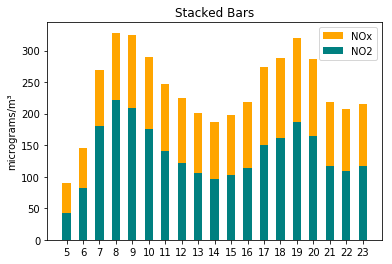

In [67]:
width = 0.5

# Hack to stack bars: first plot the sum of the columns that are to be stacked, then the column that should appear
# on the bottom, since the code below will plot the the latter bar in front of the first bar
p1 = plt.bar(df2.index, df2.loc[:,'NO2(GT)']+df2.loc[:,'NOx(GT)'], color='orange', width=width)
p2 = plt.bar(df2.index, 'NOx(GT)', data=df2, color='teal', width=width)


plt.ylabel('micrograms/m³')
plt.title('Stacked Bars')
plt.xticks(df2.index)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('NOx', 'NO2'))

plt.show()

Do you think this plot is a good visualization? Explain your answer!

__Answer__: No, the stacked bars in particular make it hard to see how the NOx values are developing over time. 

### Task 3: Visualizing Student Performance with the Seaborn Package

For this last task, we are going to use the seaborn package. This is a very powerful and popular plotting library, which is also based on matplotlib. An extensive documentation can be found here: https://seaborn.pydata.org/.

The data that we are using in this task was taken from _Kaggle_ (https://www.kaggle.com/spscientist/students-performance-in-exams) and can also be downloaded from Moodle. It includes the exam scores of 1000 students in 3 different exams (math, reading, writing), plus some information on the student demographics and on their exam preparation.

In [8]:
import seaborn as sns

# load student performance data into pandas here, and feel free to play a little
df = pd.read_csv("StudentsPerformance.csv")

#### a) Correlating Test Performances

We want to investigate whether the reading scores have a stronger correlation with the writing scores or with the math scores.
For that purpose, use seaborn to create a scatter plot in which the x-axis is represented by the reading scores, and the y-axis is shared by both writing and math scores. To distintuish math and writing scores, color the first in blue, and the latter in orange. Include corresponding axis labels and a legend to illustrate your plot. Where do you observe a stronger correlation?

_Hint:_ Apply a suitable _melt_ operation on your dataframe!

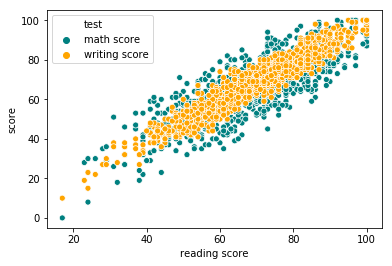

In [17]:
dfscatter = pd.melt(df, id_vars =['reading score'], value_vars =['math score', 'writing score'], var_name = "test", value_name = "score")
sns.scatterplot(x="reading score", y="score",
            hue="test", palette=["teal", "orange"],
            data=dfscatter)


#### b) Investigating the Impact of the Exam Preparation Course

We want to analyze whether taking the exam preparation course had a positive impact on the eventual test results. For that matter, we want to make use of grouped boxplots: 
Create a plot in which for each of the three exams, there is a pair (group) of boxes that represent the distibutions of the test results, one box for those students that took the exam preparation course, and one for those who did not. The x-axis is split into three groups (math, reading, writing), and the y-axis represents the test scores.

_Hint:_ Again, _melting_ your dataframe yields the easiest way to create the plot!

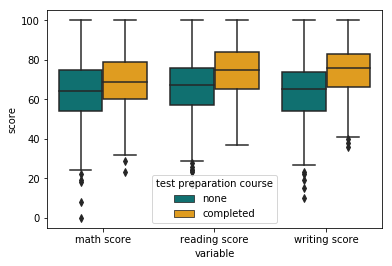

In [19]:
dfbox = pd.melt(df, id_vars =['test preparation course'], value_vars =['math score','reading score', 'writing score'], value_name="score")

sns.boxplot(x="variable", y="score",
            hue="test preparation course", palette=["teal", "orange"],
            data=dfbox)
